<a href="https://colab.research.google.com/github/AbdulMuizz789/SCT_ML_2/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Mall_Customers.xls')  # from Kaggle link you shared
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Select and scale features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


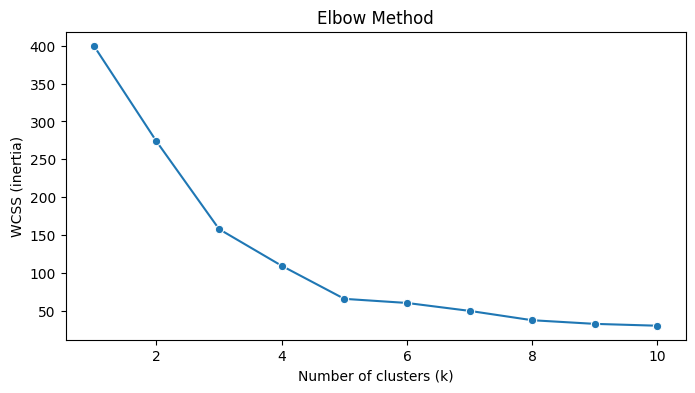

In [6]:
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

# Plot WCSS vs. k
plt.figure(figsize=(8,4))
sns.lineplot(x=range(1,11), y=wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (inertia)')
plt.title('Elbow Method')
plt.show()


In [7]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)


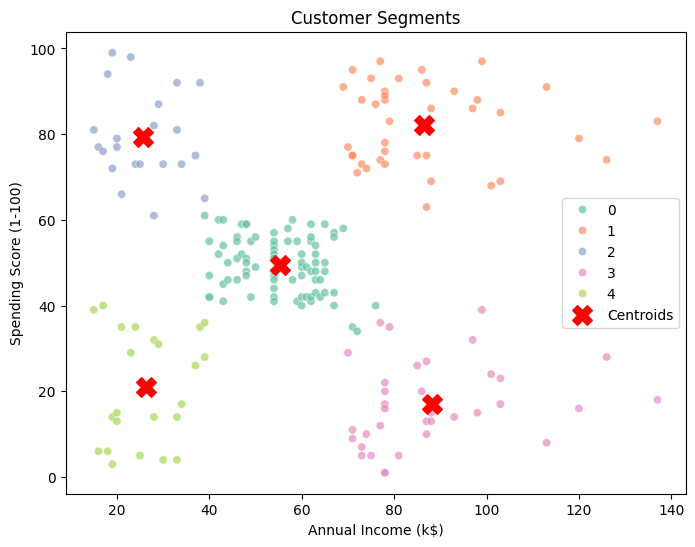

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)
plt.title('Customer Segments')
plt.legend()
plt.show()


In [11]:
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1))
print(df['Cluster'].value_counts())


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                      55.3                    49.5
1                      86.5                    82.1
2                      25.7                    79.4
3                      88.2                    17.1
4                      26.3                    20.9
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64
